In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
from torch.utils.data import Dataset
from sklearn.preprocessing import MinMaxScaler
from sklearn.base import BaseEstimator,RegressorMixin
from sklearn.datasets import load_diabetes,load_digits
#from sklearn.tree import export_grapviz
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import RFECV
from math import sqrt
from sklearn.metrics import r2_score
from xgboost import XGBRegressor
from sklearn.model_selection import KFold, GridSearchCV
from sklearn.metrics import mean_squared_error
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error,r2_score
import math
import seaborn as sns
import missingno as msno


df=pd.read_csv("/content/drive/My Drive/Colab Notebooks/Debutanizer_Data.csv")
df.columns=["Top_Temperature","Top_Pressure","Flow_of_Reflux","Flow_to_the_next_process","Temperature_of_the_sixth_tray","Temperature_A_at_Bottom","Temperature_B_at_Bottom","Butane_Concentration"]

df.head()



,Top_Temperature,Top_Pressure,Flow_of_Reflux,Flow_to_the_next_process,Temperature_of_the_sixth_tray,Temperature_A_at_Bottom,Temperature_B_at_Bottom,Butane_Concentration
0,0.269,0.651,0.833,0.583,0.785,0.843,0.822,0.180
1,0.268,0.650,0.852,0.578,0.776,0.839,0.822,0.177
2,0.268,0.660,0.824,0.572,0.765,0.808,0.786,0.174
3,0.267,0.668,0.808,0.566,0.753,0.800,0.786,0.172
4,0.267,0.647,0.762,0.560,0.745,0.773,0.746,0.167


In [ ]:
df.describe()

,Top_Temperature,Top_Pressure,Flow_of_Reflux,Flow_to_the_next_process,Temperature_of_the_sixth_tray,Temperature_A_at_Bottom,Temperature_B_at_Bottom,Butane_Concentration
count,2394.000000,2394.000000,2394.000000,2394.000000,2394.000000,2394.000000,2394.000000,2394.000000
mean,0.283882,0.667845,0.598462,0.435952,0.658082,0.620737,0.589403,0.267789
std,0.103127,0.057695,0.198576,0.138237,0.127047,0.165110,0.173248,0.158946
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.224000,0.654000,0.500000,0.363000,0.609000,0.482000,0.445000,0.169000
50%,0.264000,0.672000,0.624000,0.396000,0.695000,0.639500,0.601000,0.247000
75%,0.325750,0.691000,0.742750,0.518000,0.730000,0.755000,0.741000,0.318000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
len(df.columns)

8

In [ ]:
df.shape

(2394, 8)

In [ ]:
def missing_values_table(df):
    #Total missing values
    mis_val=df.isnull().sum()
    # Percentage of missing values

    mis_val_percent=100*mis_val/len(df)

    # Make a table with the results
    mis_val_table=pd.concat([mis_val,mis_val_percent],axis=1)

    # Rename the columns
    mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})

     # Sort the table by percentage of missing descending
    mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
    # Print some summary information
    print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")

    # Return the dataframe with missing information
    return mis_val_table_ren_columns

In [ ]:
missing_values_table(df)

Your selected dataframe has 8 columns.
There are 0 columns that have missing values.


,Missing Values,% of Total Values


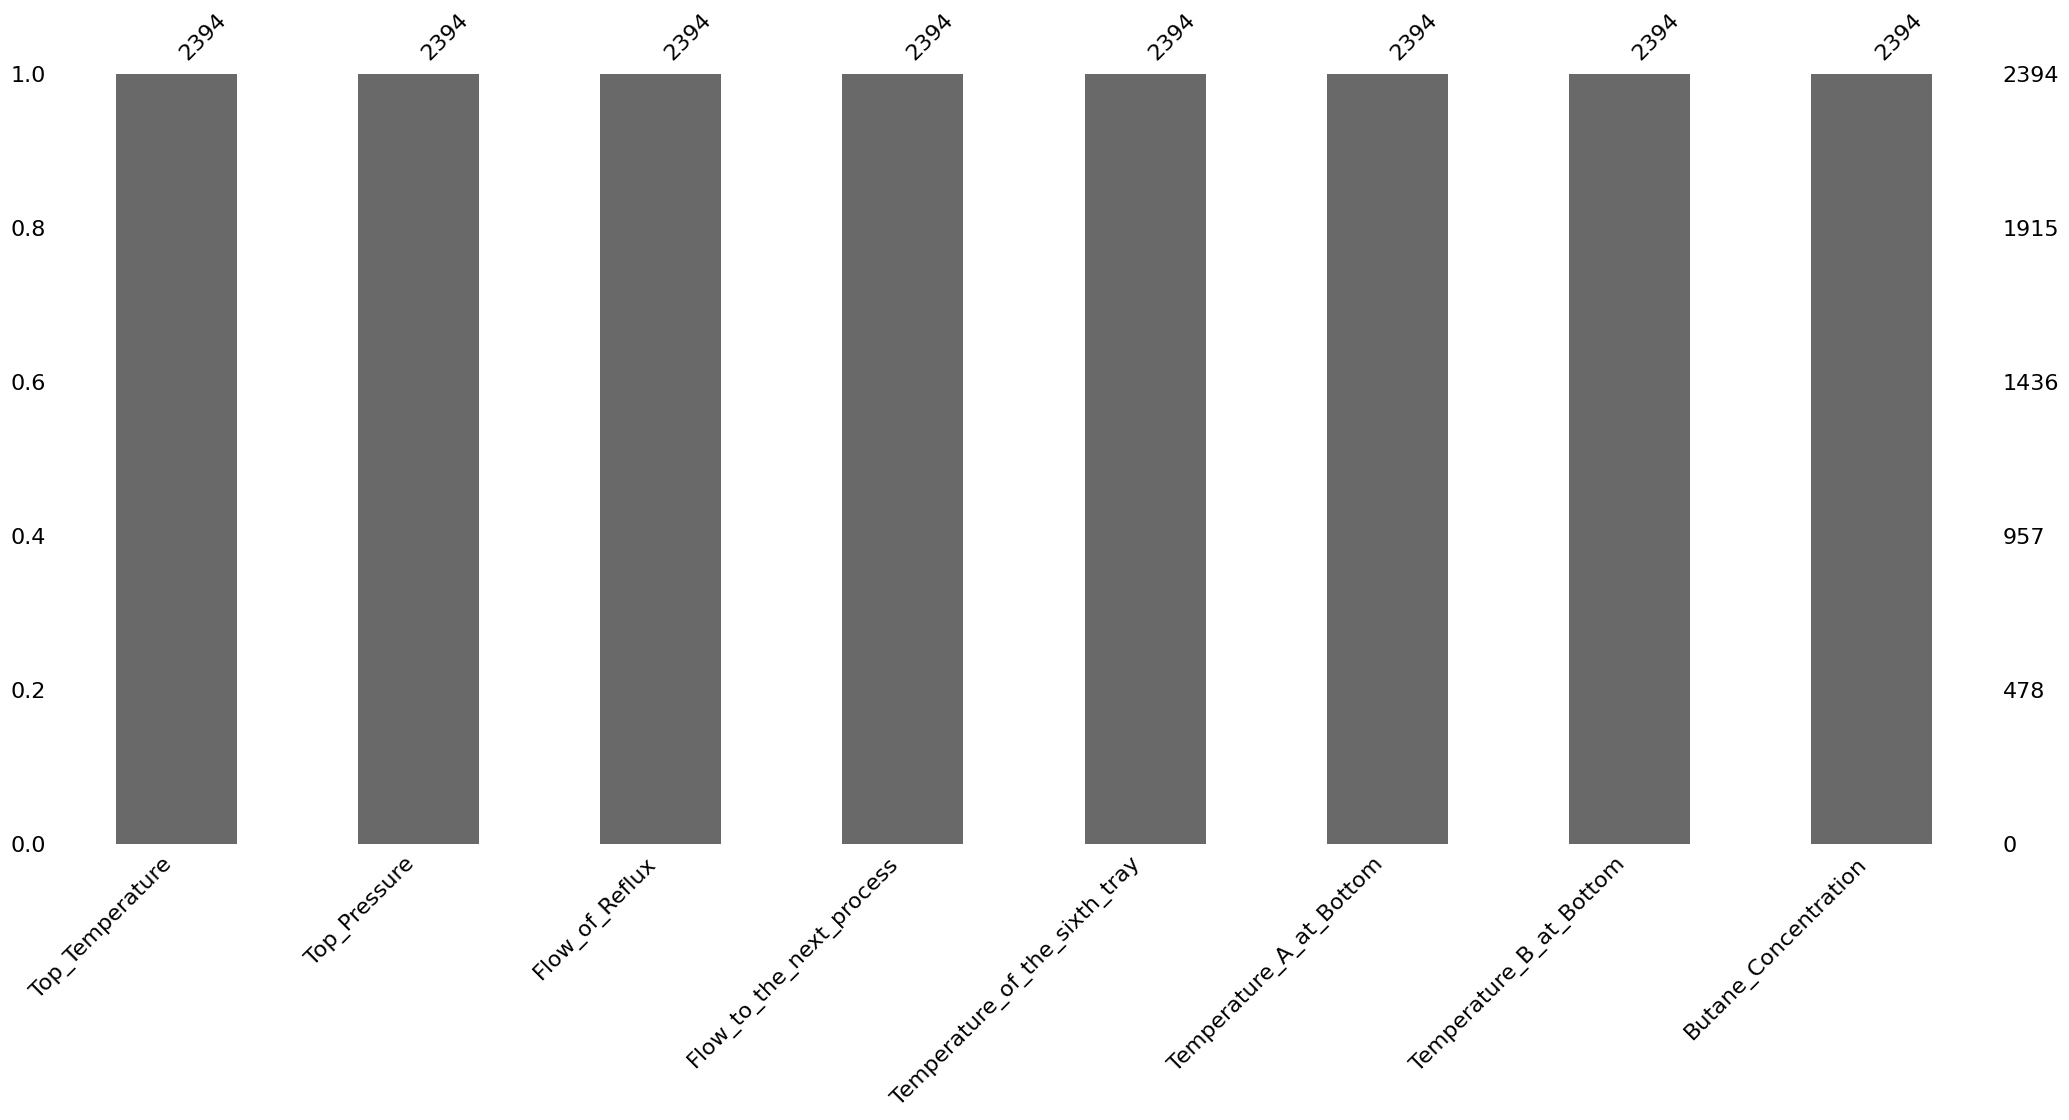

<Figure size 1200x800 with 0 Axes>

In [ ]:
msno.bar(df)
plt.figure(figsize=(12,8))  # Replace 'width' and 'height' with the desired dimensions in inches

# Show the plot
plt.show()

<Axes: >

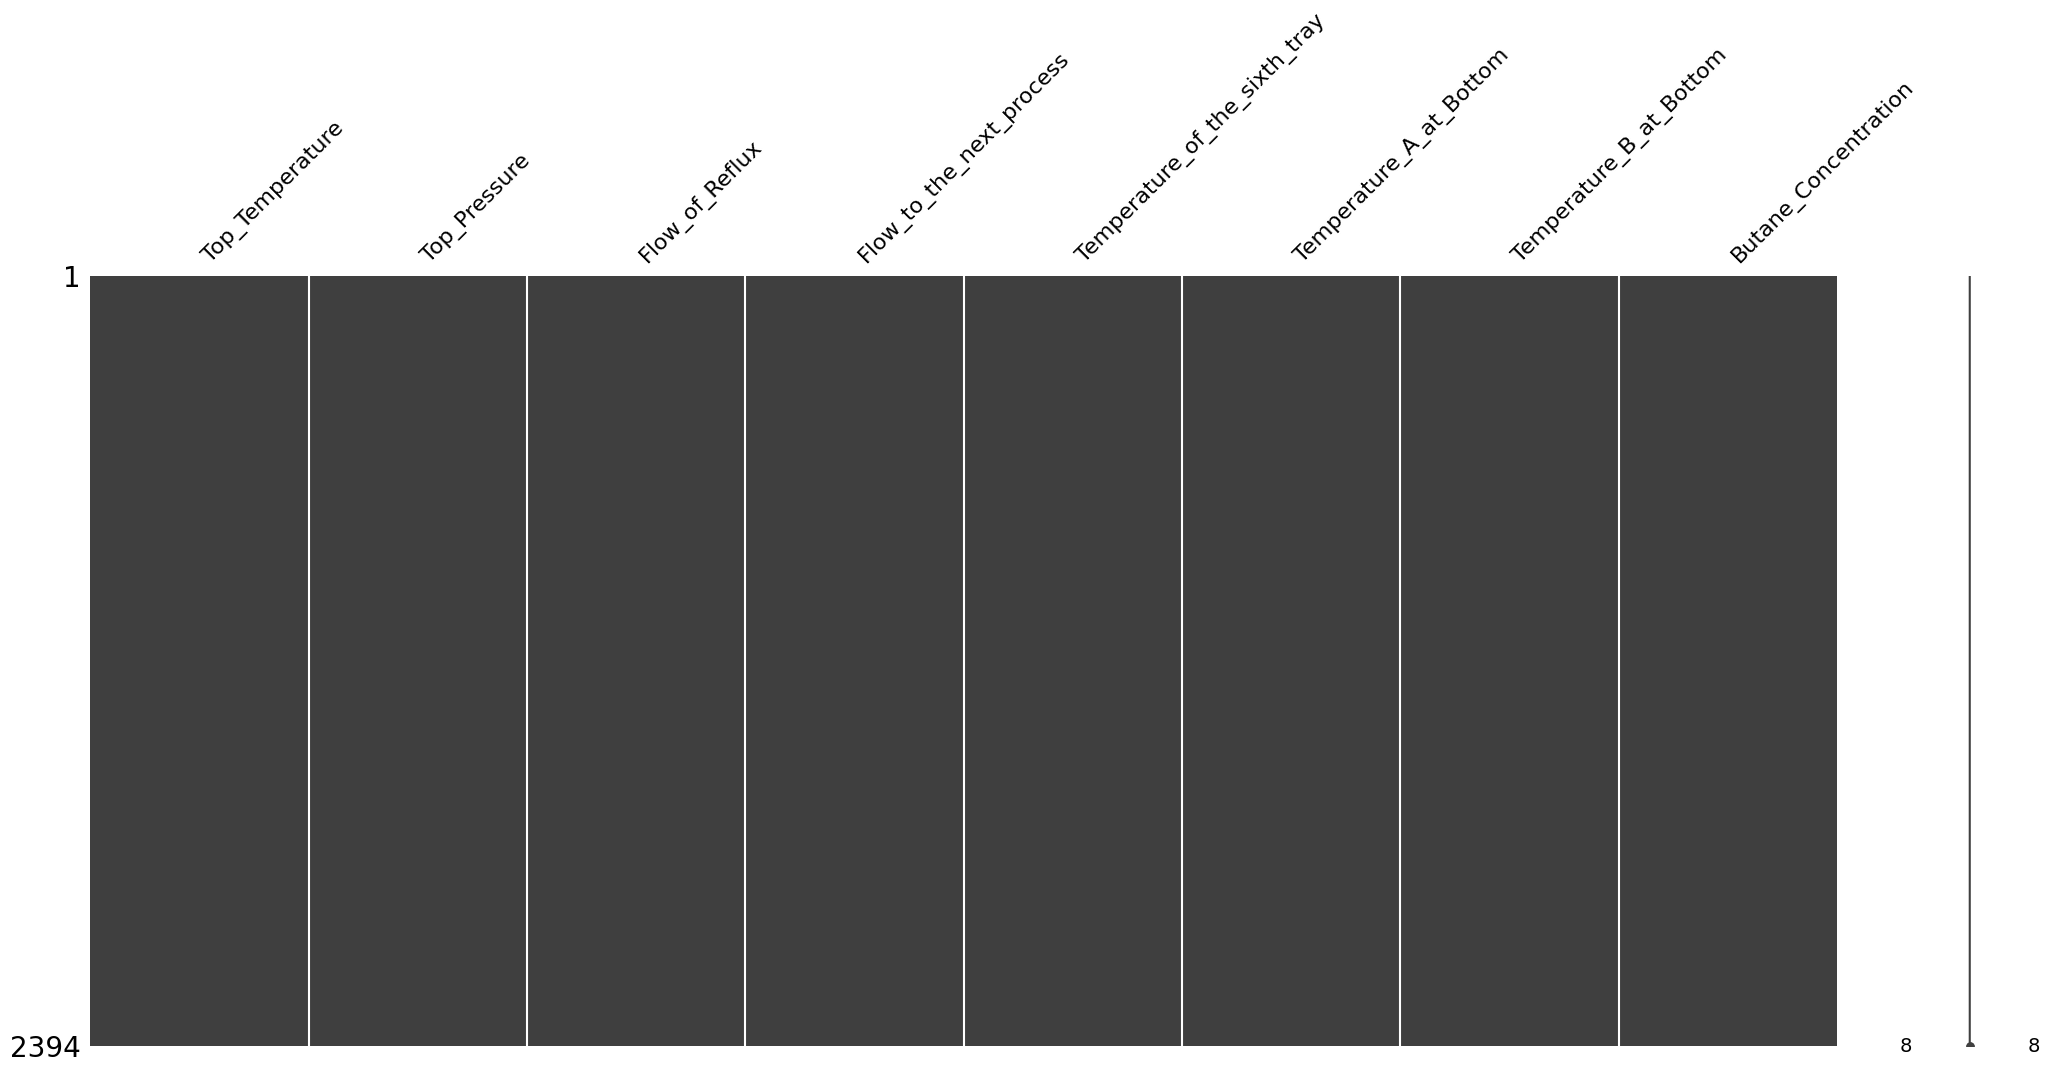

In [ ]:
msno.matrix(df)

/usr/local/lib/python3.11/dist-packages/seaborn/matrix.py:309: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  ax.set(xlim=(0, self.data.shape[1]), ylim=(0, self.data.shape[0]))
/usr/local/lib/python3.11/dist-packages/seaborn/matrix.py:309: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  ax.set(xlim=(0, self.data.shape[1]), ylim=(0, self.data.shape[0]))


<Axes: >

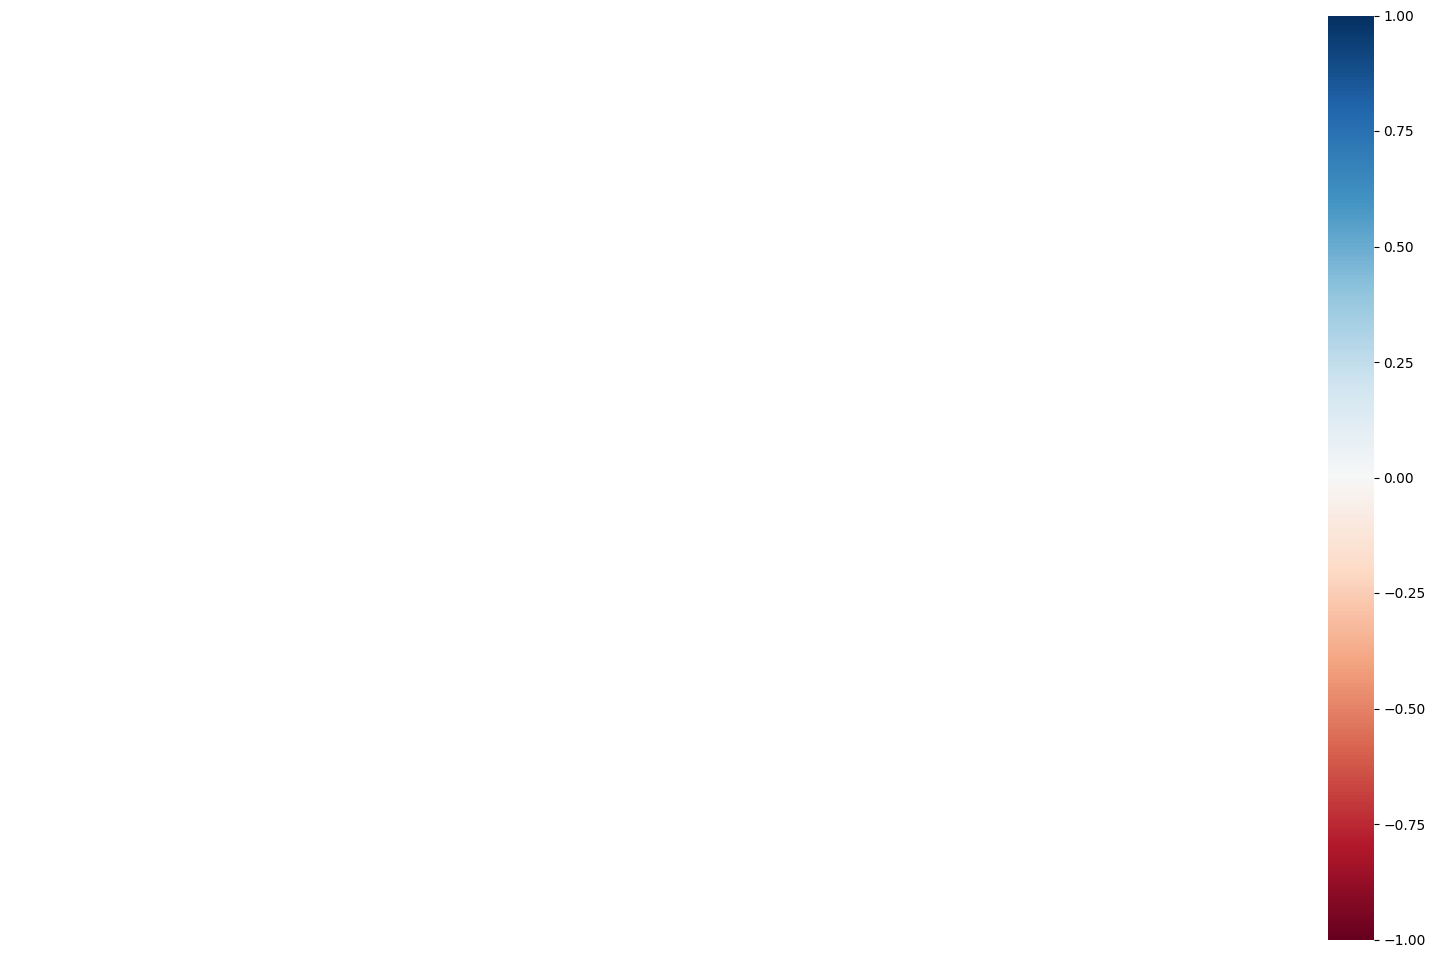

In [ ]:
msno.heatmap(df)

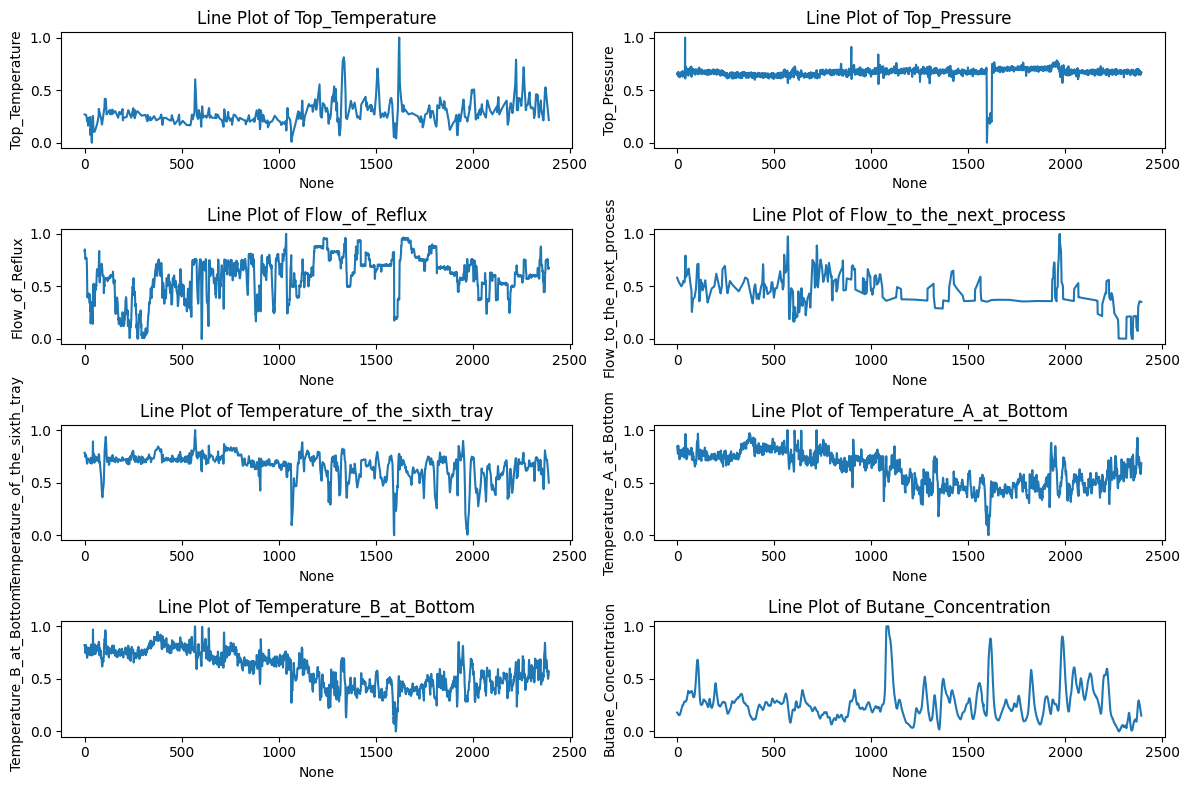

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming `df` is your DataFrame
features = df.columns
num_features = len(features)
num_cols = 2  # You can adjust the number of columns as needed
num_rows = (num_features + num_cols - 1) // num_cols

fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 8))

# Check if there are extra subplots to remove
if num_features < num_rows * num_cols:
    for i in range(num_features, num_rows * num_cols):
        fig.delaxes(axes.flatten()[i])

for i, feature in enumerate(features):
    row = i // num_cols
    col = i % num_cols
    ax = axes[row, col]
    sns.lineplot(data=df, x=df.index, y=feature, ax=ax)  # Assuming a time-based index
    ax.set_title(f'Line Plot of {feature}')

plt.tight_layout()
plt.show()

In [ ]:
df.columns

Index(['Top_Temperature', 'Top_Pressure', 'Flow_of_Reflux',
       'Flow_to_the_next_process', 'Temperature_of_the_sixth_tray',
       'Temperature_A_at_Bottom', 'Temperature_B_at_Bottom',
       'Butane_Concentration'],
      dtype='object')

Number of features: 8
Total number of subplots: 8


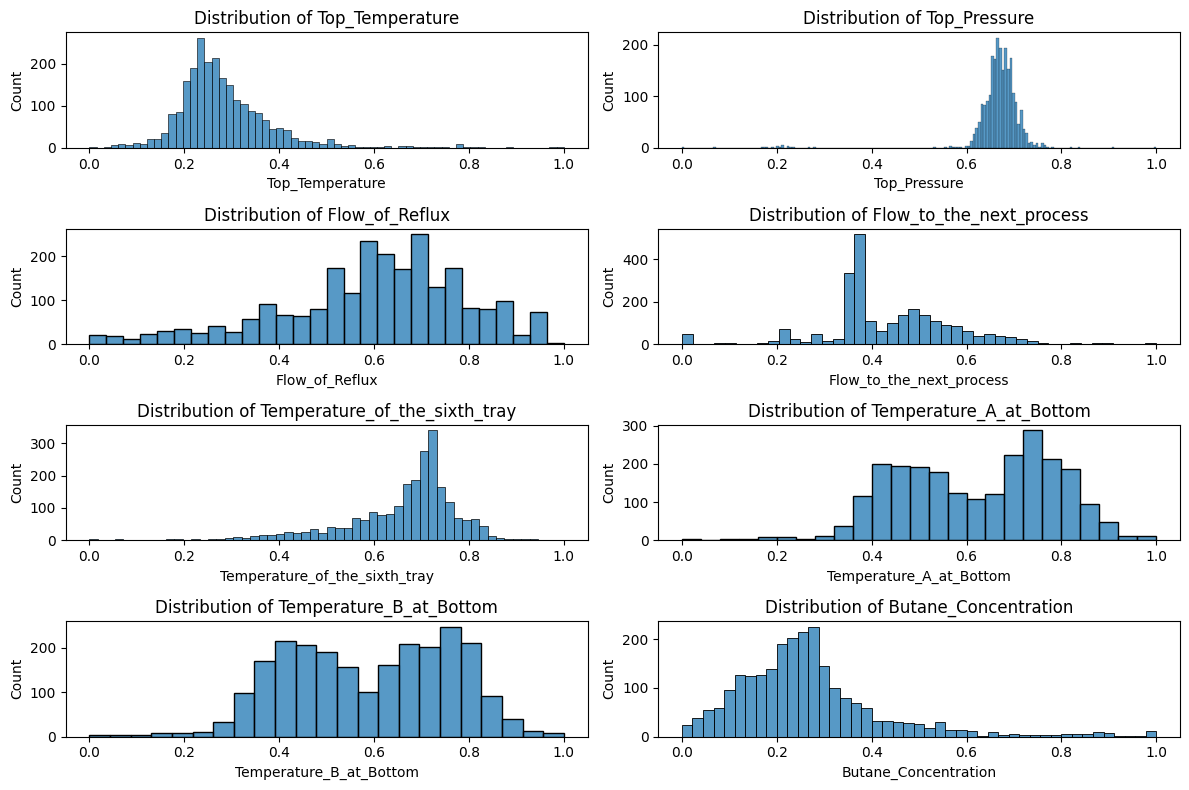

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming `df` is your DataFrame
features = df.columns
num_features = len(features)
num_cols = 2  # You can adjust the number of columns as needed
num_rows = (num_features + num_cols - 1) // num_cols

fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 8))

print(f"Number of features: {num_features}")
print(f"Total number of subplots: {num_rows * num_cols}")

# Check if there are extra subplots to remove
if num_features < num_rows * num_cols:
    for i in range(num_features, num_rows * num_cols):
        fig.delaxes(axes.flatten()[i])
        print(f"Removed subplot at index {i}")

for i, feature in enumerate(features):
    row = i // num_cols
    col = i % num_cols
    ax = axes[row, col]
    sns.histplot(df[feature], ax=ax)
    ax.set_title(f'Distribution of {feature}')

plt.tight_layout()
plt.show()


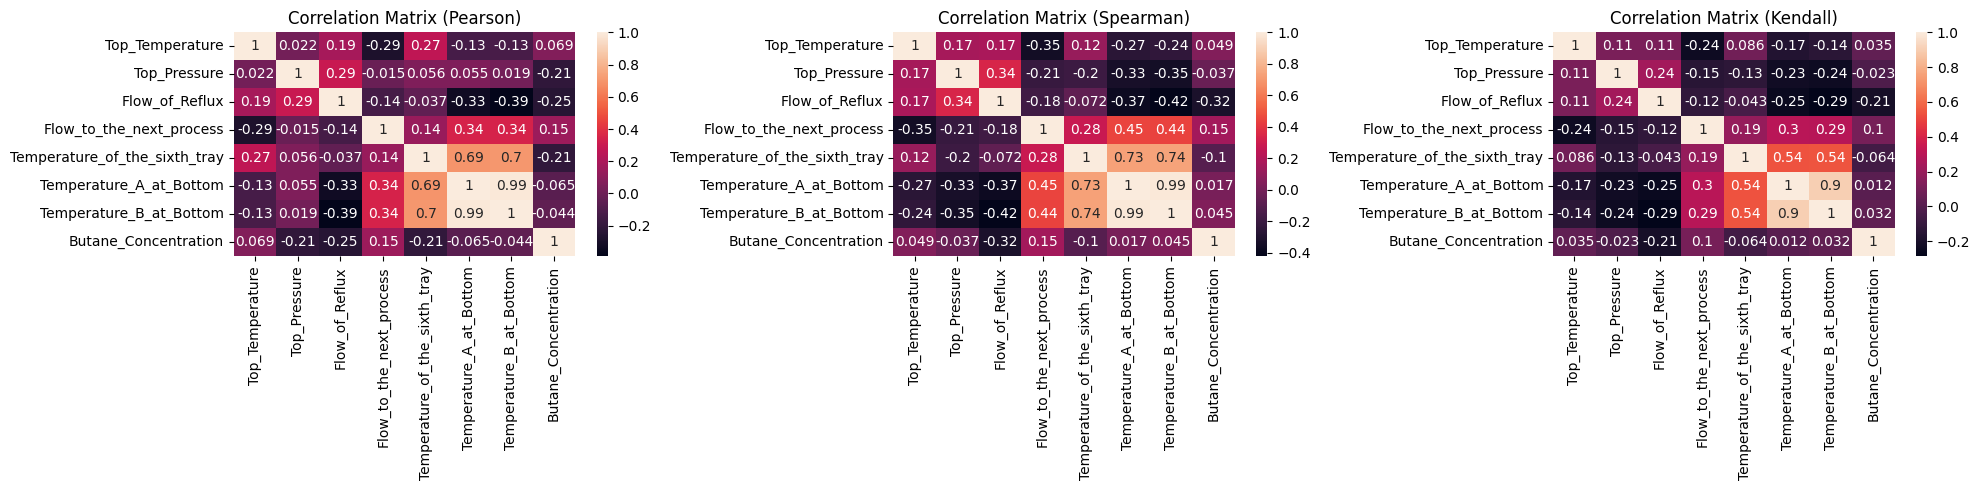

In [ ]:
# Create a list of correlation methods
methods = ['pearson', 'spearman', 'kendall']

# Set the figure size
plt.figure(figsize=(20, 5))

# Create subplots for each correlation method
for i, method in enumerate(methods):
    plt.subplot(1, 3, i + 1)  # 1 row, 3 columns, index i + 1
    sns.heatmap(df.corr(method=method), annot=True, annot_kws={'size': 10})
    plt.title(f'Correlation Matrix ({method.capitalize()})')

plt.tight_layout()
plt.show()


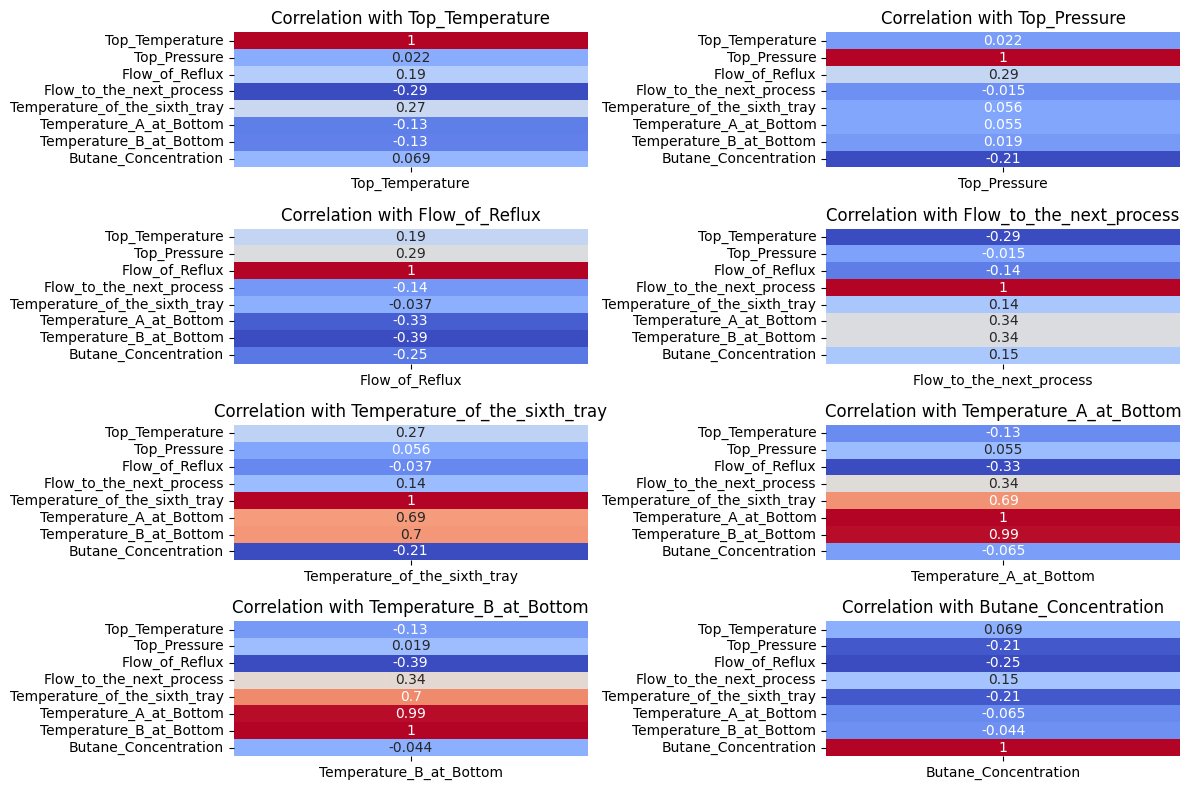

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming `df` is your DataFrame
correlation_matrix = df.corr()

# Get the number of features and set the number of columns for subplots
num_features = len(correlation_matrix.columns)
num_cols = 2  # You can adjust the number of columns as needed
num_rows = (num_features + num_cols - 1) // num_cols

# Create subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 8))

# Check if there are extra subplots to remove
if num_features < num_rows * num_cols:
    for i in range(num_features, num_rows * num_cols):
        fig.delaxes(axes.flatten()[i])

# Plot correlation matrices
features = correlation_matrix.columns
for i, feature in enumerate(features):
    row = i // num_cols
    col = i % num_cols
    ax = axes[row, col]
    sns.heatmap(correlation_matrix.loc[[feature]].T, annot=True, cmap='coolwarm', cbar=False, ax=ax)
    ax.set_title(f'Correlation with {feature}')

plt.tight_layout()
plt.show()

In [ ]:
df.columns

Index(['Top_Temperature', 'Top_Pressure', 'Flow_of_Reflux',
       'Flow_to_the_next_process', 'Temperature_of_the_sixth_tray',
       'Temperature_A_at_Bottom', 'Temperature_B_at_Bottom',
       'Butane_Concentration'],
      dtype='object')

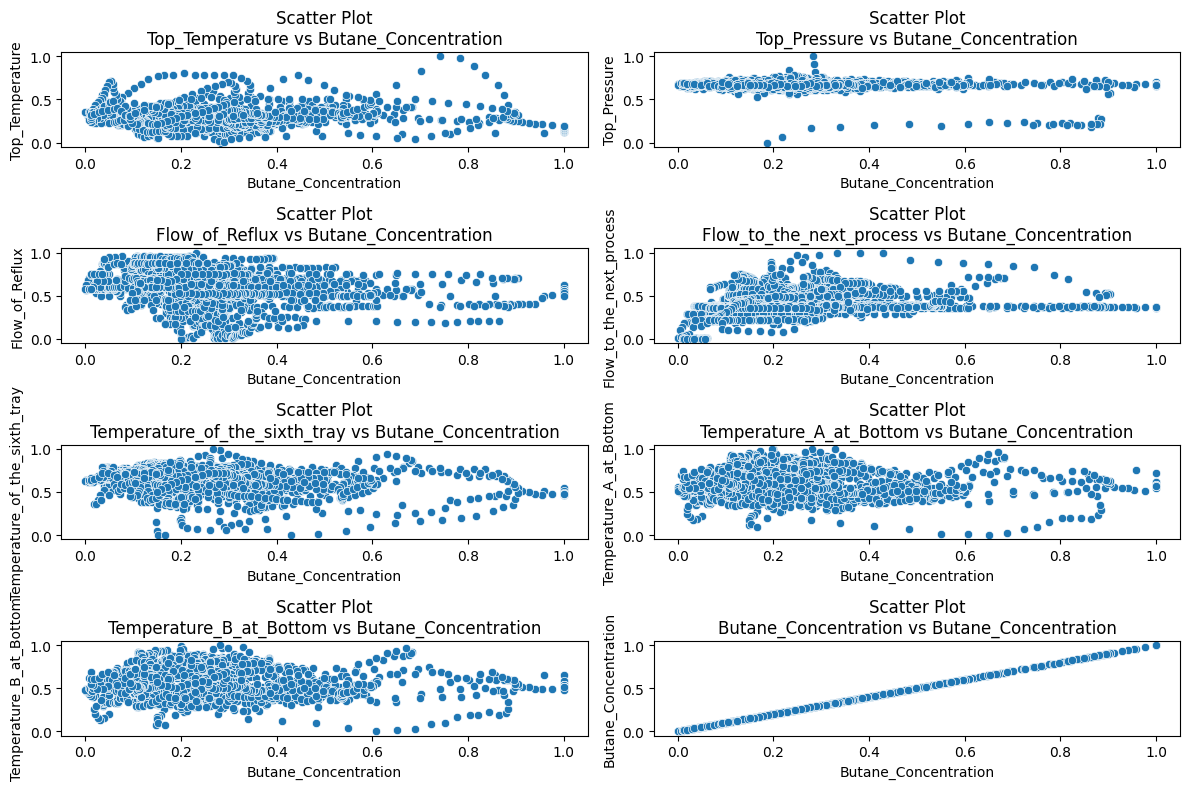

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming `df` is your DataFrame
features = df.columns
num_features = len(features)
num_cols = 2  # You can adjust the number of columns as needed
num_rows = (num_features + num_cols - 1) // num_cols

fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 8))

# Check if there are extra subplots to remove
if num_features < num_rows * num_cols:
    for i in range(num_features, num_rows * num_cols):
        fig.delaxes(axes.flatten()[i])

for i, feature in enumerate(features):
    row = i // num_cols
    col = i % num_cols
    ax = axes[row, col]
    sns.scatterplot(data=df, x="Butane_Concentration", y=df[feature], ax=ax)
    ax.set_title(f'Scatter Plot\n{feature} vs Butane_Concentration')

plt.tight_layout()
plt.show()

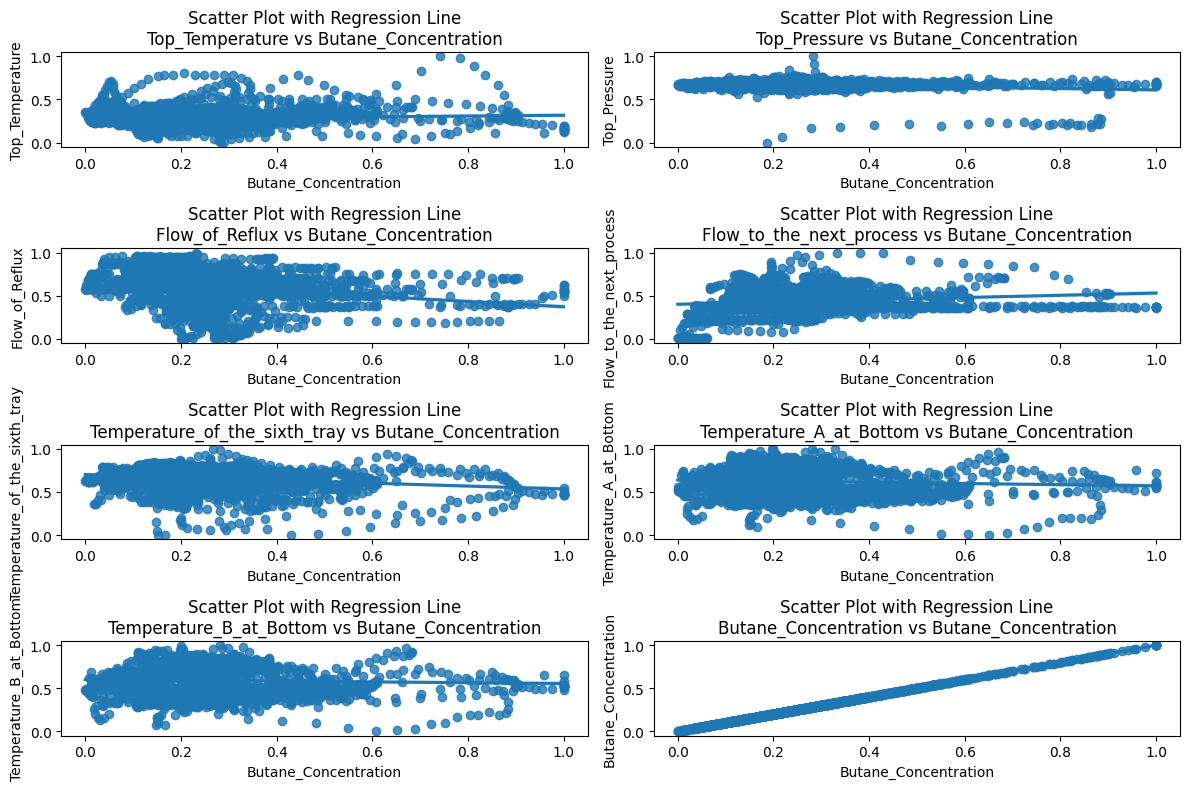

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming `df` is your DataFrame
features = df.columns
num_features = len(features)
num_cols = 2  # You can adjust the number of columns as needed
num_rows = (num_features + num_cols - 1) // num_cols

fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 8))

# Check if there are extra subplots to remove
if num_features < num_rows * num_cols:
    for i in range(num_features, num_rows * num_cols):
        fig.delaxes(axes.flatten()[i])

for i, feature in enumerate(features):
    row = i // num_cols
    col = i % num_cols
    ax = axes[row, col]

    # Create a scatter plot with a regression line
    sns.regplot(data=df, x="Butane_Concentration", y=feature, ax=ax)

    ax.set_title(f'Scatter Plot with Regression Line\n{feature} vs Butane_Concentration')

plt.tight_layout()
plt.show()

Top Temperature and Butane Concentration are Postively correlated

Top Pressure and Butane Concentration are Negitvely correlated (We need check feed conditions)

Reflux and Butane Concentration are Negitvely correlated (causlity condition)

Flow to next processand Butane Concentration are Postively correlated

sixith tray and Butane Concentration are Negitvely correlated

Bottom Temperatrure and concentraion are negtively correlated

Intercept: 0.6417822000468406
Coefficients: 0.4568740601675468


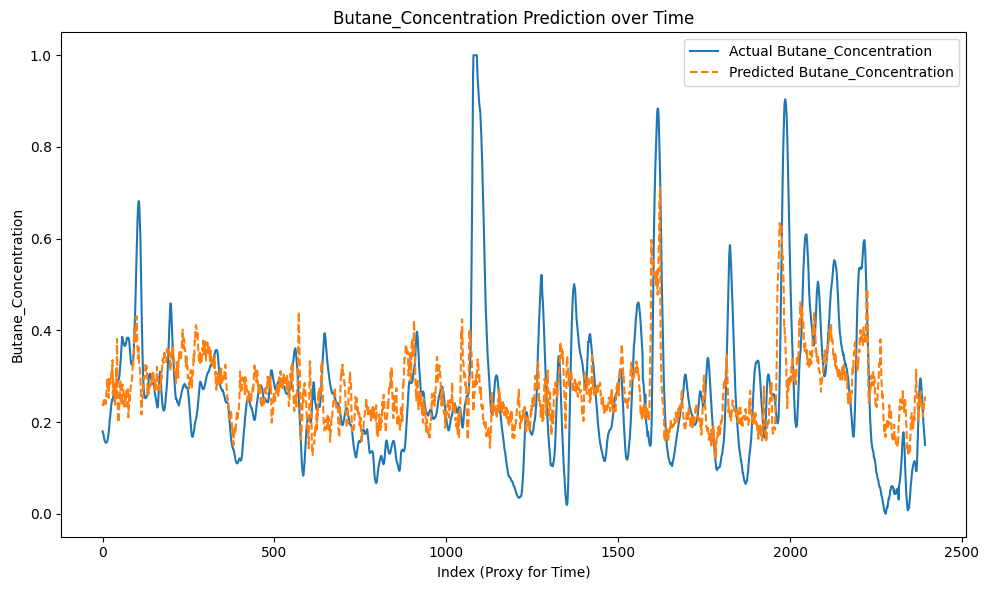

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

df = pd.read_csv("/content/drive/My Drive/Colab Notebooks/Debutanizer_Data.csv")
df.columns = ["Top_Temperature", "Top_Pressure", "Flow_of_Reflux", "Flow_to_the_next_process", "Temperature_of_the_sixth_tray", "Temperature_A_at_Bottom", "Temperature_B_at_Bottom", "Butane_Concentration"]

X = df.iloc[:, :-1]
y = df["Butane_Concentration"]

model = LinearRegression()
model.fit(X, y)

# Predict Butane_Concentration and store it in a new column within the DataFrame
df['predicted_Butane_Concentration'] = model.predict(X)

print('Intercept:', model.intercept_)
print('Coefficients:', model.coef_[0])

plt.figure(figsize=(10, 6))
plt.plot(df.index, df['Butane_Concentration'], label='Actual Butane_Concentration')
plt.plot(df.index, df['predicted_Butane_Concentration'], label='Predicted Butane_Concentration', linestyle='--')
plt.xlabel('Index (Proxy for Time)')
plt.ylabel('Butane_Concentration')
plt.title('Butane_Concentration Prediction over Time')
plt.legend()
plt.tight_layout()
plt.show()